# Lab 02-Titanic

Here, I am analyzing the relationship between fare paid and survival from Titanic's sinking.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("titanic.csv")
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


Each row is the data for a passenger in Titanic. The field 'Survived' with values 1 or 0 shows whether he survived or not. The 'Fare' column indicates the fare paid by the passenger. In order to begin the analysis, we need to understand more about the range of fares in the dataset. 

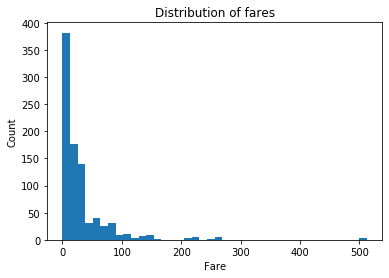

Min fare :0.000000
Max fare :512.329200


In [26]:
plt.hist(df['Fare'], bins=40)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of fares')
plt.show()
print("Min fare :%f" %df.Fare.min())
print("Max fare :%f" %df.Fare.max())

We could see that the fare ranges from 0 to 512.32 with a large distribution of values. To make the graph easier to plot, these set of fare values can be divided into bins. 

In [5]:
bins = [0,50,100,150,200,550]
df_FareBins = pd.cut(df.Fare, bins)

A pivot table can be constructed using the new dataframe 'df_FareBins' and 'Survided' data and this can be used to create the bar plot.

In [13]:
df_table= df.pivot_table(index = df_FareBins, columns='Survived', values = 'Fare', aggfunc='count')
df_table

Survived,0,1
Fare,,
"(0, 50]",480,232
"(50, 100]",37,70
"(100, 150]",5,19
"(150, 200]",3,6
"(200, 550]",6,14


Above is the pivot table created with the survival count for each fare bin. This table can be used to create a bar plot which can be further used for analysis.

Text(0, 0.5, 'Passenger Count')

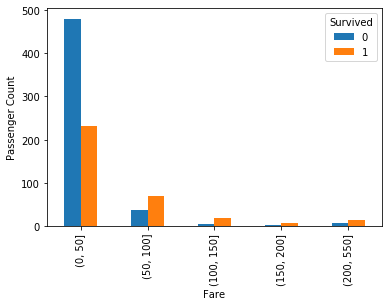

In [18]:
obj = df_table.plot(kind='bar')
obj.set_ylabel('Passenger Count')

## Conclusion

From the above bar plot, we could find that as the fare increases the chances of survival increases. For lower fares, the count of dead people is greater than the count of people survived. Towards the highest fare bins like (200-550], the survival rate is higher than the dead count.